In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
# from collections import defaultdict
# import sys; sys.path.append('../')
# from src.data_analysis.tools import ac_pca
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import random 
pd.set_option('display.max_columns', 5000)

In [6]:
# combined_data = pd.read_csv('../data/processed/pre_pca.csv')
combined_data = pd.read_csv('../data/processed/local_pairwise_multi_var_scaled.csv')
# print(combined_data[combined_data['Rural-urban_Continuum Code_2013'] > 2])
# combined_data = combined_data[combined_data['normalized_deaths'] < 0.001]
# print( combined_data[combined_data['normalized_deaths'] > 0.0003].head())
combined_data = combined_data.drop(columns='POP_ESTIMATE_2018')
# combined_data = combined_data[combined_data['Rural-urban_Continuum Code_2013'] > 1]
# combined_data.set_index('FIPS', inplace=True)
data = combined_data.drop(columns=['FIPS1', 'FIPS2', 'Deaths', 'normalized_deaths'])
print(combined_data.shape)
for col in data.columns:
    print(col)
combined_data.head()

(583, 34)
1 Month Prior Intra-Mobility
1 Month Prior Inter-Mobility
2wk Prior Intra-Mobility
2wk Onset Intra-Mobility
2wk Post Intra-Mobility
2wk Prior Inter-Mobility
2wk Onset Inter-Mobility
2wk Post Inter-Mobility
Density per square mile of land area - Population
Rural-urban_Continuum Code_2013
Percent of adults with less than a high school diploma 2014-18
Percent of adults with a bachelor's degree or higher 2014-18
Unemployment_rate_2018
Med_HH_Income_Percent_of_State_Total_2018
Total_age65plus
Total households!!Average household size
SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school preschool
SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten
SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8)
SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12)
SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school

,FIPS1,FIPS2,1 Month Prior Intra-Mobility,1 Month Prior Inter-Mobility,2wk Prior Intra-Mobility,2wk Onset Intra-Mobility,2wk Post Intra-Mobility,2wk Prior Inter-Mobility,2wk Onset Inter-Mobility,2wk Post Inter-Mobility,Density per square mile of land area - Population,Rural-urban_Continuum Code_2013,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Total_age65plus,Total households!!Average household size,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school preschool,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8),SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12),SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school,Area in square miles - Land area,NursingCt,HospCt,Hispanic Population,Black Population,Outbreak Month Temp AVG / F,Time from outbreak to intervention,Time from outbreak to national intervention,Time from national intervention to outbreak,Deaths,normalized_deaths
0,1003.0,1097.0,-0.342697,0.204549,1.251452,0.907112,1.251452,2.145553,1.423420,2.145553,0.027059,1.068392,-0.757302,0.647714,-0.794326,0.992035,0.793988,0.059330,-0.649475,-1.226761,0.169463,-0.202892,-0.539651,0.206955,0.595805,0.593005,0.237995,-2.055380,-0.057589,-1.367917,-1.050986,1.294704,-33.0,-0.000067
1,12033.0,1003.0,1.072502,0.904665,2.335637,1.674980,2.335637,2.562506,1.785262,2.562506,-0.001238,1.068392,0.126827,0.378963,0.022775,0.859024,0.674572,0.276417,-0.136818,-1.767844,1.053969,0.215399,-1.135186,0.524709,0.364625,0.374865,-0.018766,-1.078738,-0.057589,-0.681604,0.021852,1.294704,-5.0,-0.000007
2,1101.0,1051.0,1.674893,2.880798,3.053564,2.699576,3.053564,5.265570,5.002506,5.265570,0.040786,-0.001836,-0.123036,-0.580859,-0.453867,0.772567,0.004968,0.312598,0.613842,-1.564061,-0.762023,0.621988,-0.412909,-0.084807,1.486582,1.894254,0.043495,-2.844225,1.178964,-1.825459,0.021852,2.839259,1.0,0.000059
3,1073.0,1125.0,0.551483,1.107270,-1.651463,-1.604922,-1.651463,-1.794419,-1.643833,-1.794419,0.187570,-2.142291,-0.219137,0.163963,-0.045317,0.220574,0.484115,-0.555751,0.243573,0.239223,0.465290,0.354604,-1.961163,-0.109596,-1.075709,-0.984229,0.099200,0.865778,-1.456517,2.292418,1.094691,-3.101339,19.0,-0.000010
4,1081.0,13215.0,2.049380,3.173286,1.368273,1.296207,1.368273,1.461298,1.808261,1.461298,-0.075388,1.068392,-0.584320,0.609321,-1.066693,0.676135,-0.277584,0.348780,-0.422970,-1.027793,-0.779063,-0.123655,2.247777,0.224041,0.220790,0.239142,-0.272957,-1.870864,-0.170003,0.385994,0.826481,-0.131040,15.0,0.000098


In [3]:
def process_likelihood(data):
    pca = PCA(0.999999, whiten=True)
    X = pca.fit_transform(data)
    num_components = X.shape[1]
    var_explained = np.array(pca.explained_variance_ratio_)
    print(var_explained, '\n\n')
    print('total var:', np.sum(var_explained[:5]))
    components = []
    variances = []
    for i in range(len(var_explained)): 
        n_components = i + 1
        components.append(n_components)
        variances.append(var_explained[i])
        print(n_components, variances[i])
    plt.plot(components, variances, 'bo-')
    
    
    X = np.append(X,np.array(combined_data['HospCt']).reshape(-1,1), axis=1)
    X = np.append(X,np.array(combined_data['normalized_deaths']).reshape(-1,1), axis=1)
    columns = ['Principal_Component_' + str(i+1) for i in range(num_components)]
    column_names = ''
    for col in columns:
        column_names += col + '+'
    column_names = column_names[0:len(column_names)-1]
    print(column_names)
    print(columns)
    columns.append("HospCt")
    columns.append('normalized_deaths')
    pre_likelihood_ratio_test = pd.DataFrame(data=X, columns=columns)
    return pre_likelihood_ratio_test

[2.76756340e-01 1.55981560e-01 1.30252232e-01 7.70162335e-02
 4.85217273e-02 4.10602982e-02 3.39180566e-02 2.88694557e-02
 2.77660409e-02 2.51485617e-02 2.39847894e-02 2.04232295e-02
 1.85270793e-02 1.74050418e-02 1.27821495e-02 9.93336531e-03
 9.50724321e-03 8.54333731e-03 6.66761779e-03 6.39918567e-03
 6.09320432e-03 5.60515182e-03 3.65451186e-03 2.24655043e-03
 1.75535233e-03 6.67461613e-04 4.64043304e-04 5.01791173e-05] 


total var: 0.6885280934526348
1 0.2767563402832847
2 0.15598155998127197
3 0.1302522324179674
4 0.07701623350125306
5 0.04852172726885755
6 0.041060298213282935
7 0.0339180565942855
8 0.02886945572888065
9 0.02776604085137496
10 0.025148561710375085
11 0.023984789358611223
12 0.02042322952028933
13 0.018527079281914608
14 0.017405041768463466
15 0.012782149452806351
16 0.009933365305124441
17 0.009507243209458607
18 0.00854333730625085
19 0.006667617791751897
20 0.0063991856670191066
21 0.006093204317299004
22 0.005605151822672961
23 0.0036545118576947247
24 0.00

,Principal_Component_1,Principal_Component_2,Principal_Component_3,Principal_Component_4,Principal_Component_5,Principal_Component_6,Principal_Component_7,Principal_Component_8,Principal_Component_9,Principal_Component_10,Principal_Component_11,Principal_Component_12,Principal_Component_13,Principal_Component_14,Principal_Component_15,Principal_Component_16,Principal_Component_17,Principal_Component_18,Principal_Component_19,Principal_Component_20,Principal_Component_21,Principal_Component_22,Principal_Component_23,Principal_Component_24,Principal_Component_25,Principal_Component_26,Principal_Component_27,Principal_Component_28,HospCt,normalized_deaths
0,1.466335,-0.767948,-0.767142,-0.448484,-0.344316,-0.068782,-0.351632,-1.492427,0.978848,1.337333,0.250108,1.080705,0.501423,-0.757622,-0.404887,-0.764367,0.997435,0.043177,2.622294,-0.147680,-0.717641,0.442137,-2.208956,-1.010101,-0.766103,-0.072021,-0.113067,-4.580259,0.593005,-0.000067
1,1.991557,-0.091357,-0.237096,0.510583,-0.360927,-0.577760,-0.632149,-1.551892,1.803491,0.647291,-0.808860,0.281240,-0.035140,-1.324273,-0.251664,0.035216,0.644900,0.933648,2.321024,-0.950944,-0.169349,-0.854301,-0.283048,-3.106569,-1.880127,0.175669,-0.056108,-2.493378,0.374865,-0.000007
2,3.837036,-0.490461,-0.714013,0.338067,-2.317519,0.650186,-2.020090,-0.536132,1.138385,1.604780,-1.808553,0.501839,-0.628383,0.718340,1.788066,-0.737277,-0.581895,0.074748,1.833797,2.380534,-2.274075,0.452599,-0.383990,-1.504447,0.130597,-0.292893,5.212137,1.247889,1.894254,0.000059
3,-1.450117,1.632117,-0.123218,1.030965,2.352988,-0.794643,-0.834532,0.008679,-0.577405,-0.003989,1.255162,-1.134635,0.257100,2.252614,-0.436074,-1.587252,-0.052034,1.394492,-2.027983,0.890101,-0.148049,-0.239141,-0.018549,0.505019,0.049113,0.702704,2.635448,-0.044993,-0.984229,-0.000010
4,1.408541,0.709806,-1.108333,0.666826,-0.700460,2.228953,-1.274839,0.684600,1.269388,-0.367722,-0.395398,2.334057,-0.278735,-2.184870,0.224911,-1.400919,-0.635777,-0.589891,-0.894477,0.714563,-0.955903,-0.039650,0.674954,0.290360,0.185662,0.840675,-1.688905,2.234268,0.239142,0.000098


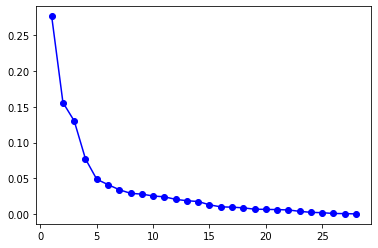

In [4]:
with_hosp = process_likelihood(data)
with_hosp.to_csv('../data/processed/pca_withHosp_local_pairwise_multi_var.csv', index=False)
with_hosp.head()

[2.82806848e-01 1.47622192e-01 1.34743610e-01 7.95216491e-02
 4.91741672e-02 3.98208527e-02 3.23654128e-02 2.94371498e-02
 2.81982260e-02 2.57403207e-02 2.37435006e-02 2.01886072e-02
 1.90401805e-02 1.75921224e-02 1.30843855e-02 1.02370571e-02
 8.85268978e-03 8.59062815e-03 6.89257289e-03 6.58810936e-03
 6.09919886e-03 4.26005813e-03 2.34956534e-03 1.81891328e-03
 6.90928717e-04 4.89140407e-04 5.19124611e-05] 


total var: 0.6938684673719824
1 0.2828068483616497
2 0.14762219218462
3 0.13474361046983543
4 0.07952164911101753
5 0.04917416724485966
6 0.03982085266685376
7 0.03236541281982895
8 0.029437149791487944
9 0.02819822601966227
10 0.025740320688166153
11 0.023743500587848174
12 0.0201886071684288
13 0.019040180471802115
14 0.01759212244457386
15 0.013084385517613201
16 0.010237057055575087
17 0.008852689783599639
18 0.008590628153592093
19 0.006892572891666966
20 0.006588109362684174
21 0.006099198863180672
22 0.004260058128932188
23 0.0023495653426968853
24 0.0018189132840669576


,Principal_Component_1,Principal_Component_2,Principal_Component_3,Principal_Component_4,Principal_Component_5,Principal_Component_6,Principal_Component_7,Principal_Component_8,Principal_Component_9,Principal_Component_10,Principal_Component_11,Principal_Component_12,Principal_Component_13,Principal_Component_14,Principal_Component_15,Principal_Component_16,Principal_Component_17,Principal_Component_18,Principal_Component_19,Principal_Component_20,Principal_Component_21,Principal_Component_22,Principal_Component_23,Principal_Component_24,Principal_Component_25,Principal_Component_26,Principal_Component_27,HospCt,normalized_deaths
0,1.437843,-0.906560,-0.765314,-0.486468,-0.238793,-0.005061,-1.053996,-0.803713,-1.324013,1.281620,-0.411695,0.839990,0.483838,-0.756832,-0.490981,-0.478584,-0.247452,1.045426,2.636560,0.086820,0.416132,-2.410450,-0.868898,-0.814619,-0.060702,-0.159607,-4.581835,0.593005,-0.000067
1,1.998868,-0.270530,-0.236316,0.481777,-0.212968,0.635795,-1.122611,-0.603409,-2.225429,0.100902,-0.704802,-0.056500,0.187567,-1.321625,-0.223844,0.183408,0.683311,1.091675,2.318314,-0.930500,0.807965,-0.182322,-3.012806,-1.951952,0.190104,-0.120275,-2.496250,0.374865,-0.000007
2,3.794394,-0.654015,-0.712654,0.317892,-2.536848,0.568135,-1.712748,0.081125,-1.388164,0.848548,-2.323318,-0.306432,-0.537600,1.001665,1.655809,-0.845292,0.238070,-0.649059,1.855334,2.979466,1.095822,-0.800796,-1.517319,0.112986,-0.329439,5.130815,1.240273,1.894254,0.000059
3,-1.382241,1.801665,-0.126704,1.105064,2.302861,0.821176,-0.494645,-0.106009,0.707164,0.434876,1.459205,-0.334484,-0.052980,2.341256,-0.608169,-1.515813,1.301855,0.516644,-2.071288,0.795513,0.210544,0.090847,0.514034,0.055342,0.684266,2.600087,-0.049053,-0.984229,-0.000010
4,1.433930,0.686854,-1.109566,0.699308,-1.193267,-1.560466,-1.963580,1.733071,-0.050543,-0.091821,-1.615320,1.118544,-0.058938,-2.247785,0.271045,-1.515436,-0.460256,-0.586618,-0.865559,0.911960,0.649495,0.392861,0.182714,0.223307,0.834681,-1.564759,2.241437,0.239142,0.000098


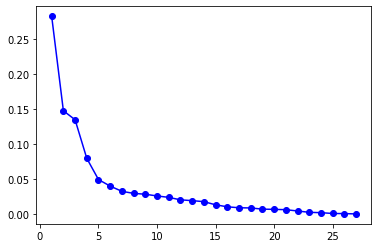

In [5]:
without_hosp = process_likelihood(data.drop(columns=["HospCt"]))
without_hosp.to_csv('../data/processed/pca_withoutHosp_local_pairwise_multi_var.csv', index=False)
without_hosp.head()